In [2]:
import pandas as pd
import numpy as np

df_train = pd.read_csv(".\\ml-100k_u1\\u1.base",delimiter='\t',names=['user_id','item_id','rating','timestamp'])


df_for_histogram = df_train.groupby('item_id',as_index=False)['rating'].mean()

df_train_items = pd.read_csv(".\\ml-100k_u1\\u.item",delimiter='|',names=['item_id','movie title','release date','video release date','IMDb URL'
          ,'unknown','Action','Adventure','Animation','Childrens','Comedy',
          'Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi',
        'Thriller','War','Western'])


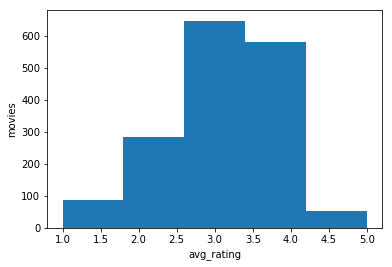

,item_id,movie title,rating
1181,1189,Prefontaine (1997),5.0
1620,1653,Entertaining Angels: The Dorothy Day Story (1996),5.0
1566,1599,Someone Else's America (1995),5.0


In [16]:
import matplotlib.pyplot as plt


df_for_histogram = pd.merge(df_for_histogram,df_train_items)

_ = plt.hist(df_for_histogram['rating'],bins=5)
_ = plt.xlabel('avg_rating')
_ = plt.ylabel('movies')
plt.show()




df_for_histogram.sort_values(by='rating',ascending=False)[['item_id','movie title','rating']].head(3)

gender,F,M
item_id,,
1,3.800000,3.925795
2,3.200000,3.177778
3,2.538462,3.096774
4,3.315789,3.586466
5,3.882353,3.115385
6,3.500000,3.375000
7,3.593750,3.851852
8,4.018519,3.983193
9,3.840580,3.830508


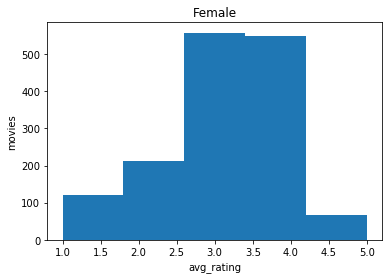

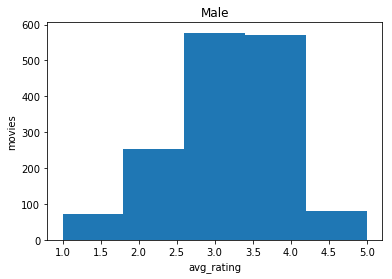

,item_id,movie title,F
0,1594,Everest (1998),5.0
1,1150,Last Dance (1996),5.0
2,1301,Stripes (1981),5.0


,item_id,movie title,M
0,1500,Santa with Muscles (1996),5.0
1,1189,Prefontaine (1997),5.0
2,1656,Little City (1998),5.0


,item_id,movie title,F,M,diff
0,1175,Hugo Pool (1997),1.0,5.000000,4.000000
1,851,Two or Three Things I Know About Her (1966),1.0,4.666667,3.666667
2,1429,Sliding Doors (1998),1.0,4.500000,3.500000


In [58]:
from IPython.display import display, HTML


df_train_users = pd.read_csv(".\\ml-100k_u1\\u.user",delimiter='|',names=['user_id','age','gender','occupation','zip_code'])

df_train_users_merges = pd.merge(df_train,df_train_users)



mean_ratings = df_train_users_merges.pivot_table('rating',index=['item_id'],columns='gender',aggfunc='mean')



display(mean_ratings)

_ = plt.hist(mean_ratings['F'].dropna(),bins=5)
_ = plt.title('Female')
_ = plt.xlabel('avg_rating')
_ = plt.ylabel('movies')
plt.show()

_ = plt.hist(mean_ratings['M'].dropna(),bins=5)
_ = plt.title('Male')
_ = plt.xlabel('avg_rating')
_ = plt.ylabel('movies')
plt.show()

ratings_active = mean_ratings;

display(pd.merge(mean_ratings.sort_values(by='F',ascending=False)['F'].head(3).reset_index(),df_train_items)[['item_id','movie title','F']])
display(pd.merge(mean_ratings.sort_values(by='M',ascending=False)['M'].head(3).reset_index(),df_train_items)[['item_id','movie title','M']])

ratings_active = ratings_active.dropna()
ratings_active = ratings_active.sort_index(ascending=True)

ratings_active['diff'] = abs((ratings_active['F']-ratings_active['M']))
ratings_active = ratings_active.sort_values(by = 'diff',ascending=False)

pd.merge(ratings_active.head(3).reset_index(),df_train_items)[['item_id','movie title','F','M','diff']]


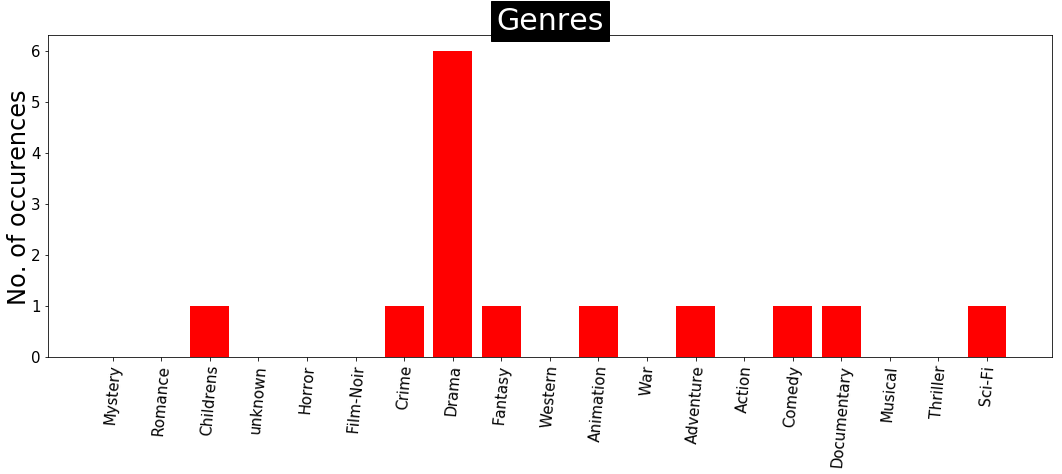

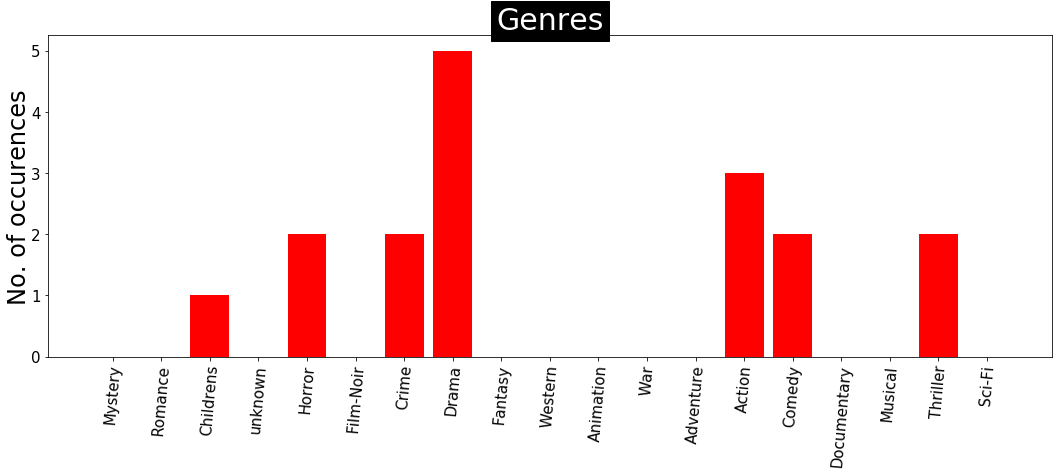

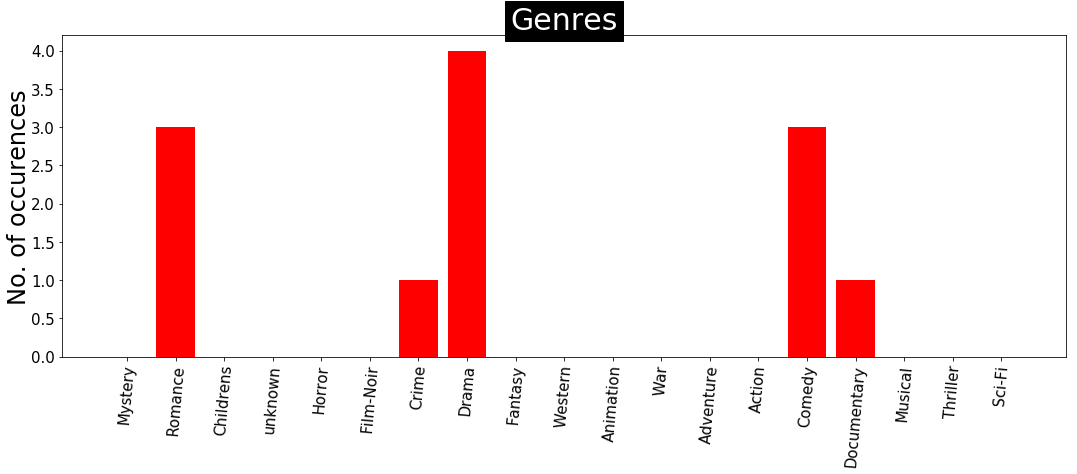

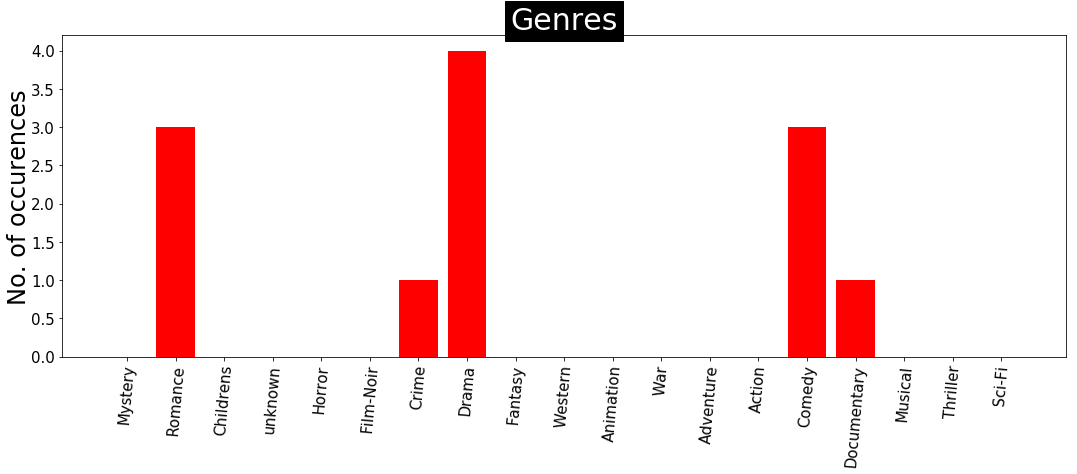

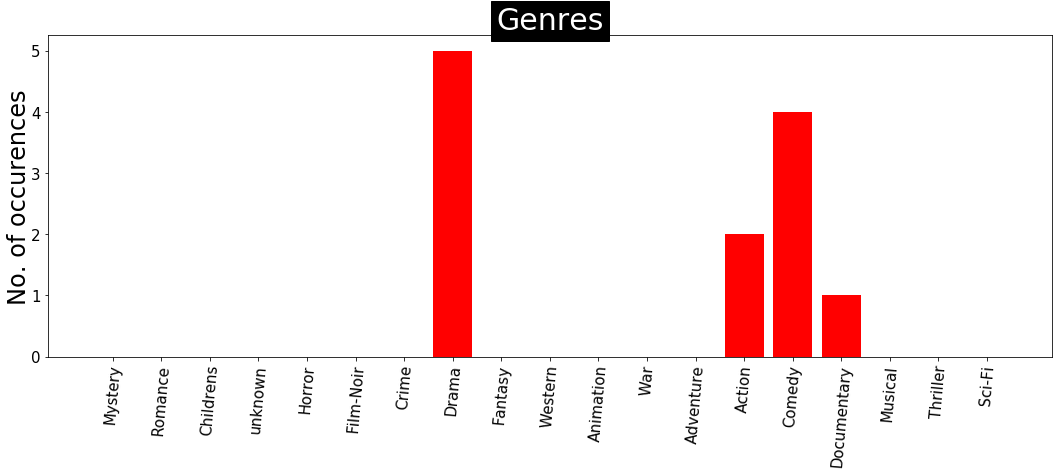

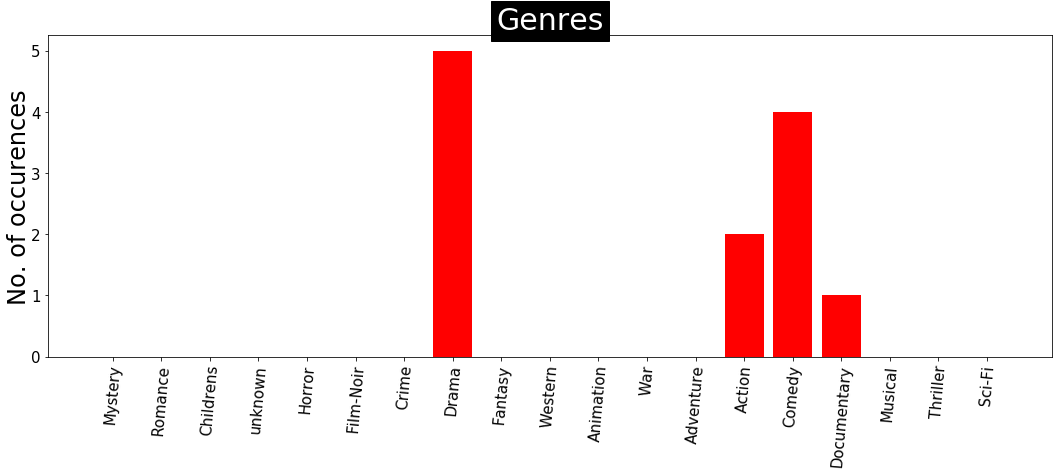

In [64]:

genres = ['unknown','Action','Adventure','Animation','Childrens','Comedy',
          'Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi',
        'Thriller','War','Western']



df_user_rating_top = df_for_histogram.sort_values(by='rating',ascending=False).head(10)
df_user_rating_tail = df_for_histogram.sort_values(by='rating',ascending=False).tail(10)

df_train_users_items_top = pd.merge(df_user_rating_top,df_train_items)
df_train_users_items_tail = pd.merge(df_user_rating_tail,df_train_items)

# mean_ratings_top_buttom_female = mean_ratings.sort_values(by='F',ascending=False)['F'].head(10).append(mean_ratings.sort_values(by='F',ascending=False)['F'].dropna().tail(10))
# mean_ratings_top_buttom_female = mean_ratings_top_buttom_female.to_frame().reset_index().drop(['F'],axis=1)

# df_train_users_items_Female = pd.merge(mean_ratings_top_buttom_female,df_train_items)

# genres_count = {}
# for genre in genres:
#     count = 0
#     genre_movies = df_train_users_items_Female[genre] == 1
#     genres_count[genre] = df_train_users_items_Female[genre_movies].shape[0]

# fig = plt.figure(1, figsize=(18,13))
# ax2 = fig.add_subplot(2,1,2)
# y_axis = [genres_count[i] for i in genres_count]
# x_axis = [i for i in range(len(genres_count))]
# x_label = [i for i in genres_count]
# plt.xticks(rotation=85, fontsize = 15)
# plt.yticks(fontsize = 15)
# plt.xticks(x_axis, x_label)
# plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
# ax2.bar(x_axis, y_axis, align = 'center', color='r')
# plt.title("Popularity of Genres",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
# plt.show()

mean_ratings_top_male = mean_ratings.sort_values(by='M',ascending=False)['M'].head(10)
mean_ratings_top_male = mean_ratings_top_male.to_frame().reset_index().drop(['M'],axis=1)
mean_ratings_top_male_genres = pd.merge(mean_ratings_top_male,df_train_items)

mean_ratings_tail_male = mean_ratings.sort_values(by='M',ascending=False)['M'].tail(10)
mean_ratings_tail_male = mean_ratings_tail_male.to_frame().reset_index().drop(['M'],axis=1)
mean_ratings_tail_male_genres = pd.merge(mean_ratings_top_male,df_train_items)

mean_ratings_top_female = mean_ratings.sort_values(by='F',ascending=False)['F'].head(10)
mean_ratings_top_female = mean_ratings_top_female.to_frame().reset_index().drop(['F'],axis=1)
mean_ratings_top_female_genres = pd.merge(mean_ratings_top_female,df_train_items)

mean_ratings_tail_female = mean_ratings.sort_values(by='F',ascending=False)['F'].tail(10)
mean_ratings_tail_female = mean_ratings_tail_female.to_frame().reset_index().drop(['F'],axis=1)
mean_ratings_tail_female_genres = pd.merge(mean_ratings_top_female,df_train_items)

list_top_tail=[df_train_users_items_top,df_train_users_items_tail,
               mean_ratings_top_male_genres,mean_ratings_tail_male_genres,
               mean_ratings_top_female_genres,mean_ratings_tail_female_genres]

#mean_ratings_top_male_female = mean_ratings_top_buttom_male.to_frame().reset_index().drop(['M'],axis=1)

# df_train_users_items_Male = pd.merge(mean_ratings_top_buttom_male,df_train_items)

for lst in list_top_tail:
    genres_count = {}
    for genre in genres:
        count = 0
        genre_movies = lst[genre] == 1
        genres_count[genre] = lst[genre_movies].shape[0]

    fig = plt.figure(1, figsize=(18,13))
    ax2 = fig.add_subplot(2,1,2)
    y_axis = [genres_count[i] for i in genres_count]
    x_axis = [i for i in range(len(genres_count))]
    x_label = [i for i in genres_count]
    plt.xticks(rotation=85, fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xticks(x_axis, x_label)
    plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
    ax2.bar(x_axis, y_axis, align = 'center', color='r')
    plt.title("Genres",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
    plt.show()

In [10]:
df_items_sum_rating = df_train.groupby('item_id',as_index=False)['rating'].sum()

df_items_sum_rating['rating'] = df_items_sum_rating['rating']/(943 *5)

df_items_sum_rating = df_items_sum_rating.sort_values(by = 'rating',ascending = False)

df_items_sum_rating_items = pd.merge(df_items_sum_rating,df_train_items)

df_items_sum_rating_items[['item_id','movie title','rating']].head(10)


,item_id,movie title,rating
0,50,Star Wars (1977),0.447508
1,181,Return of the Jedi (1983),0.359067
2,100,Fargo (1996),0.344221
3,258,Contact (1997),0.325981
4,1,Toy Story (1995),0.316225
5,174,Raiders of the Lost Ark (1981),0.309862
6,127,"Godfather, The (1972)",0.307105
7,286,"English Patient, The (1996)",0.299682
8,288,Scream (1996),0.285684
9,300,Air Force One (1997),0.272959
